In [3]:
# ls *.csv

In [233]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [234]:
df = pd.read_csv('MKTCAP_GR.csv', encoding = 'cp932')
data = df.dropna()

data.groupby('ddate').count()

,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
ddate,,,,,,,,,,,,,,,,,,,,,
2000,339,339,339,339,339,339,339,339,339,339,...,339,339,339,339,339,339,339,339,339,339
2001,341,341,341,341,341,341,341,341,341,341,...,341,341,341,341,341,341,341,341,341,341
2002,341,341,341,341,341,341,341,341,341,341,...,341,341,341,341,341,341,341,341,341,341
2003,358,358,358,358,358,358,358,358,358,358,...,358,358,358,358,358,358,358,358,358,358
2004,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
2005,389,389,389,389,389,389,389,389,389,389,...,389,389,389,389,389,389,389,389,389,389
2006,436,436,436,436,436,436,436,436,436,436,...,436,436,436,436,436,436,436,436,436,436
2007,452,452,452,452,452,452,452,452,452,452,...,452,452,452,452,452,452,452,452,452,452
2008,439,439,439,439,439,439,439,439,439,439,...,439,439,439,439,439,439,439,439,439,439


In [236]:
y = data.MKTCAP
x = data.loc[:, '売上' :'使用資産']

# rename columns for plots
x.columns = [ 'v' + str(i) for i in range(1, x.shape[1] + 1)]

x.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67
0,43.9143,3.2794,3.2482,34.0403,4.4293,1.0819,17.3527,0.8794,14.6434,0.1984,...,3.4568,3.2794,0.000000,0.074677,0.0,6.1012,11.8415,-9.3213,14.6434,17.1636
1,40.9510,0.2350,-0.7530,44.2850,1.7340,4.4300,19.6690,0.6270,12.8810,2.9500,...,26.5750,0.2350,0.000000,0.005739,0.0,3.7760,13.5050,-12.8700,12.8810,13.5160
2,10.9207,3.0013,2.0257,83.9710,0.0793,0.0000,0.0000,1.0395,78.5441,8.0549,...,16.7596,3.0013,0.000000,0.274827,0.0,-45.5933,-0.0793,8.0549,78.5441,86.5197
3,34.2833,4.7588,2.6313,24.5565,17.7117,0.0000,21.2303,0.0000,1.2367,0.0000,...,18.6015,-8.7916,0.395248,0.138808,0.0,17.7117,3.5186,-5.9551,1.2367,-1.1998
4,379.5033,31.3202,14.7845,264.9924,20.2257,0.9137,158.0551,7.6909,43.3560,11.5552,...,115.6343,31.3202,0.000000,0.082529,0.0,-70.3225,136.9157,-43.4373,43.3560,136.8344


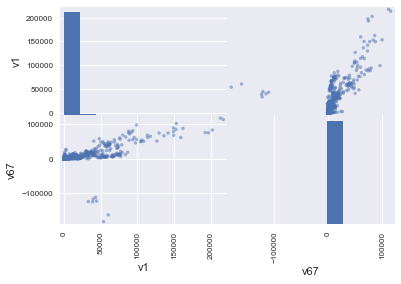

In [237]:
# matrix scatterplot of data from all years  

pd.plotting.scatter_matrix(x.loc[:, ['v1', 'v67']], diagonal = 'hist')
plt.tight_layout

plt.show()

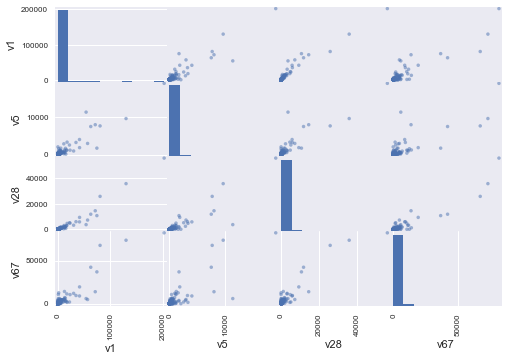

In [40]:
# matrix scatterplot of data from the year with the most sample points available

x = data[data['ddate'] == 2014].loc[:, '売上' :'使用資産']
y = data[data['ddate'] == 2014].MKTCAP

x.columns = [ 'v' + str(i) for i in range(1, x.shape[1] + 1)]
pd.plotting.scatter_matrix(x.loc[:, ['v1', 'v5', 'v28', 'v67']], diagonal = 'hist')
plt.tight_layout

plt.show()

In [52]:
# the mapping 
num = np.array(x.columns)
name = np.array(data.loc[:, '売上': '使用資産'].columns)

# to map  ['v1', 'v5', 'v28', 'v67'] in the plot back

name[[0, 4, 27, 66]]

array(['売上', '現金･現金同等物', '売掛金', '使用資産'], dtype=object)

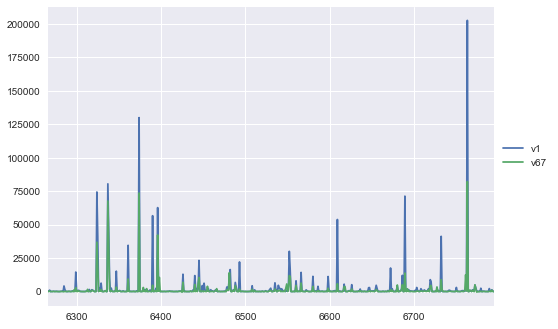

In [54]:
# profile plot of data in 2014

ax = x[['v1', 'v67']].plot()
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

In [58]:
# summary statistics 
x.apply([np.mean, np.std])

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67
mean,2745.745402,227.189481,149.851563,3842.708189,270.308669,89.239728,1432.053815,364.455264,955.025027,367.627825,...,1212.723266,-370.561695,0.108852,-4.106195,0.0,-492.017553,1071.211601,-800.791088,958.170757,1228.591269
std,13548.617562,1096.296519,806.427050,21553.899199,1297.139472,665.597903,8086.595719,3809.415544,4690.324803,3544.813709,...,5801.443197,2059.727059,0.193288,67.734496,0.0,3381.687157,6264.540130,4362.913820,4696.248347,6549.341207


In [121]:
# calculating correlation between variables and get pearson product moment correaltion test p-values 

# matrix of test of correlation p-values
m = np.zeros((x.shape[1], x.shape[1]))
for i in range(len(num)):
    for j in range(len(num)):
        m[i, j] = scipy.stats.pearsonr(x.loc[:, num[i]], x.loc[:, num[j]])[1]
        

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [122]:
# inpect the matrix of p-values
# less than 0.05 - statistically significantly correlated 
np.sum(m < 0.05, axis = 0)

array([48, 51, 48, 48, 48, 46, 48, 47, 48, 45, 51, 48, 52,  3, 19,  0,  0,
        0,  8, 51,  0,  0,  0,  0, 51,  0, 17, 48, 48, 48, 52, 49, 45, 47,
        0, 48, 48, 52,  4, 48,  0, 19, 51, 39, 50, 50, 51, 47, 47, 49, 48,
       48, 48, 48, 49, 48,  1, 52, 49, 44,  1,  0, 50, 48, 48, 49, 48])

In [126]:
m[:, 1],
name[1]

'営業利益'

In [129]:
name[np.sum(m < 0.05, axis = 0) == 0]

array(['敷金及び保証金', '賞与引当金', '決算発表日', '剰余金の配当', '自己株式の取得', '自己株式の消却',
       '新株の発行', '土地1', '経常利益', '長期社債(当期返済分)', '株主還元'], dtype=object)

In [145]:
col = list(name[np.sum(m < 0.05, axis = 0) == 0])
# these are the all zero columns
np.sum(data[col] == 0)

敷金及び保証金        7287
賞与引当金          7287
決算発表日          7287
剰余金の配当         7287
自己株式の取得        7287
自己株式の消却        7287
新株の発行          7287
土地1            7287
経常利益           7287
長期社債(当期返済分)    7287
株主還元           7287
dtype: int64

In [169]:
# access dataframe columns by column names 
x.loc[:, ['v3', 'v4']]
x[['v3', 'v4']]
x.v3
# access dataframe columns by column location
x.iloc[:, [2, 3]]
type(x)


pandas.core.frame.DataFrame

In [173]:
# access dataframe rows by row names/ index 
x.loc[[6268, 6269]]
x.loc[6268:6269]
# access dataframe rows by row location 
x.iloc[[2, 3]]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67
6268,1058.622,6.3130,-15.4020,706.6170,101.5580,2.176,353.8650,5.382,255.28,64.831,...,248.9030,6.3130,0.0,0.005963,0.0,-116.4780,250.1310,-133.891,255.28,371.5200
6269,0.324,0.0885,-1.2294,2.4017,0.0084,0.000,0.2803,0.000,0.00,0.000,...,0.0019,0.0885,0.0,0.273148,0.0,0.0084,0.2719,-2.200,0.00,-1.9281


In [298]:
# remove the  all zero columns and carry out the test for correlation again using 
# the built-in function any

df = data.loc[:, (data != 0).any(axis = 0)]
df.columns

# keep companies that exist in both 2013 and 2014 
x_2013= df[df['ddate'] == 2013].drop('MKTCAP', axis = 1)
y_2014 = df[df['ddate'] == 2014][['security_code','MKTCAP']]
data2 = pd.merge(x_2013, y_2014, how = 'inner', on = ['security_code'])
data2.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2013,1PL,30.1950,167.1170,12.3130,5.3910,221.7340,15.3940,0.0000,142.7590,...,127.3650,-10.7530,78.8160,195.4280,0.063005,0.407783,0.464488,0.080308,0.165340,8.265000
1,2013,2GB,134.6720,126.1297,2.7796,0.8943,88.6293,10.4454,0.0300,66.7018,...,56.2264,-18.8558,15.8228,53.1934,0.052255,0.020640,0.067669,0.043284,0.021144,99.276300
2,2013,2HRA,256.5099,1214.3960,-4.4050,-14.0290,594.6560,109.6240,1.7970,341.4460,...,230.0250,-144.8070,197.9060,283.1240,-0.015559,-0.017173,-0.031176,-0.011114,-0.013010,0.000000
3,2013,3GOK,0.1493,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.0000,0.6903,...,0.6668,-2.2038,0.0000,-1.5370,0.117567,-1.210315,-1.104505,-0.073710,-0.157706,0.074600
4,2013,4DS,71.8468,60.8263,1.0161,0.7158,78.0599,3.5673,1.4441,32.0063,...,26.9949,-7.8704,42.7124,61.8369,0.016432,0.014143,0.028931,0.015545,0.013207,55.100962


In [320]:
# extract independent and dependent vairables 
x = data2.loc[:, '売上': '使用資産']
y = data2.MKTCAP

# if renaming the columns in x is necessary
x.columns = ['v' + str(i) for i in range(1, x.shape[1] + 1)]

In [287]:
print (len(num))
num = np.array(x.columns)
name = np.array(df.loc[:, '売上': '使用資産'].columns)

56


In [291]:
# matrix of test of correlation p-values
m = np.zeros((x.shape[1], x.shape[1]))
for i in range(len(num)):
    for j in range(len(num)):
        m[i, j] = scipy.stats.pearsonr(x.loc[:, num[i]], x.loc[:, num[j]])[1]
        

In [292]:
# there are 56 vairables in the model. 
# only three of them are not correalted with half or more than half of the other variables

np.sum(m < 0.05, axis = 0)

array([48, 51, 48, 48, 48, 47, 48, 47, 50, 45, 51, 47, 52,  2, 17,  9, 51,
       50, 15, 48, 48, 48, 52, 49, 45, 48, 48, 48, 52,  4, 46, 20, 49, 41,
       51, 51, 49, 43, 48, 48, 47, 48, 49, 48, 48, 47,  1, 52, 49, 40,  1,
       49, 48, 48, 49, 46])

In [197]:
# correlation matrix can also be calculated in pandas 
corrmat = x.corr()
corrmat

,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,自己資本その他,株主資本,販管費,売上総利益率,営業利益率,純現金資産,営業資産,営業負債,有形固定,使用資産
売上,1.000000,0.777653,0.665710,0.930114,0.889676,0.420694,0.894821,0.526348,0.882173,0.809930,...,-0.000071,0.915853,-0.849078,0.090383,0.006142,-0.301179,0.864627,-0.642597,0.881945,0.673799
営業利益,0.777653,1.000000,0.794068,0.745550,0.725574,0.324101,0.689274,0.392027,0.706723,0.599683,...,0.053327,0.819936,-0.652927,0.133548,0.006193,-0.259842,0.657978,-0.472543,0.706684,0.549845
純利益,0.665710,0.794068,1.000000,0.622279,0.653392,0.302426,0.622708,0.366274,0.512427,0.541821,...,0.035093,0.677998,-0.566550,0.101690,0.004401,-0.140666,0.592996,-0.398997,0.512353,0.440937
総資産,0.930114,0.745550,0.622279,1.000000,0.855674,0.482732,0.909216,0.694025,0.891914,0.851664,...,0.017378,0.927633,-0.770668,0.077065,0.005124,-0.188299,0.876853,-0.777256,0.891763,0.569756
現金･現金同等物,0.889676,0.725574,0.653392,0.855674,1.000000,0.400451,0.845956,0.479725,0.751511,0.753190,...,0.012402,0.859738,-0.750374,0.085592,0.005367,-0.239145,0.785696,-0.578404,0.751354,0.585628
有価証券,0.420694,0.324101,0.302426,0.482732,0.400451,1.000000,0.536851,0.294332,0.409153,0.647481,...,-0.001348,0.402359,-0.301460,0.020661,0.002150,-0.163332,0.393826,-0.246657,0.409001,0.352526
流動資産,0.894821,0.689274,0.622708,0.909216,0.845956,0.536851,1.000000,0.478134,0.779226,0.835416,...,0.000975,0.838642,-0.737050,0.073105,0.004945,-0.306234,0.981943,-0.687484,0.778963,0.662477
総長期投資,0.526348,0.392027,0.366274,0.694025,0.479725,0.294332,0.478134,1.000000,0.473876,0.514880,...,-0.001376,0.462535,-0.304518,0.003253,0.002212,0.504944,0.447137,-0.840584,0.473676,-0.093374
有形固定資産,0.882173,0.706723,0.512427,0.891914,0.751511,0.409153,0.779226,0.473876,1.000000,0.813337,...,0.063957,0.897700,-0.768094,0.067369,0.005337,-0.443661,0.748870,-0.521814,0.999971,0.763484
短期借入金,0.809930,0.599683,0.541821,0.851664,0.753190,0.647481,0.835416,0.514880,0.813337,1.000000,...,0.004806,0.789852,-0.637619,0.040591,0.003244,-0.404252,0.771000,-0.449043,0.813030,0.728075


In [ ]:
# test for outliers 
## or build two models, one for higher value MKTCAP, the others for lower value MKTCAP
## study the companies with high or low MKTCAP; any API can give company info instantly?

In [ ]:
# outliers affect results from pearson product moment test p-values
## use more robust statistical tests for correlation 

In [ ]:
# multi-colinearity in regression -- inaccurate estiamtion of coefficients -- any effects on predictions?
### multicollinearity and Random Forest
## tackle the problem of multicolinearity using feature selection techniques   
### PCA is not feature selection?


In [242]:
# standardizing the independent variables - not the dependent variables 
# standardization is the first step for PCA

from sklearn.preprocessing import scale 

stdx = scale(x)
stdx = pd.DataFrame(stdx, index = x.index, columns = x.columns)

stdx.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56
0,-0.215094,-0.199741,-0.139155,-0.182999,-0.191761,-0.076036,-0.174985,-0.078596,-0.185287,-0.115198,...,-0.017576,-0.211976,0.179011,-0.558693,0.028142,0.054893,-0.166775,0.134828,-0.185469,-0.129957
1,-0.215335,-0.203190,-0.144671,-0.182460,-0.194049,-0.073274,-0.174677,-0.078641,-0.185660,-0.114328,...,-0.017576,-0.207197,0.177594,-0.558693,0.027637,0.054481,-0.166497,0.134297,-0.185840,-0.130442
2,-0.217786,-0.200056,-0.140840,-0.180374,-0.195454,-0.076928,-0.177288,-0.078567,-0.171795,-0.112715,...,-0.017576,-0.209226,0.178882,-0.558693,0.029608,0.045730,-0.168763,0.137423,-0.171983,-0.120724
3,-0.215880,-0.198066,-0.140006,-0.183497,-0.180483,-0.076928,-0.174470,-0.078753,-0.188118,-0.115261,...,-0.017576,-0.208845,0.173390,1.277192,0.028612,0.056951,-0.168163,0.135330,-0.188298,-0.132401
4,-0.187706,-0.167979,-0.123254,-0.170861,-0.178348,-0.076175,-0.156311,-0.077378,-0.179225,-0.111608,...,-0.017576,-0.188784,0.192070,-0.558693,0.028199,0.041346,-0.145914,0.129731,-0.179409,-0.114026


In [293]:
# outliers ?

def outliers(y):
    quantile_1, quantile_3 = np.percentile(y, [25, 75])
    iqr = quantile_3 - quantile_1
    lower = quantile_1 - (iqr * 1.5)
    upper = quantile_3 + (iqr * 1.5)
    
    return np.where((y > upper) | (y < lower))

In [294]:
outlier = np.ravel(outliers (y))

In [295]:
outlier.shape
# y.shape[0]

(81,)

In [319]:
# companies considered as outliers accoring to Tukey's box and whisker plot with quantiles
data2.iloc[y[outlier].index].head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
16,2013,ABA,595.4184,1704.3901,-9.6034,-43.5675,484.986,14.5931,54.4409,321.269,...,252.235,-259.0776,68.973,62.1304,-0.154568,-0.016129,-0.155240,-0.097016,-0.015124,511.650500
31,2013,AFX,1995.7443,906.4450,132.6100,92.1310,983.074,6.2860,0.8270,735.459,...,728.346,-204.3940,54.433,578.3850,0.229276,0.066446,0.272795,0.206476,0.066120,1668.960900
32,2013,AGS,409.2738,984.9680,24.5650,34.5910,159.270,3.9690,0.0000,111.825,...,107.856,-21.9190,25.878,111.8150,0.219693,0.060021,0.257745,0.179050,0.060609,378.155800
33,2013,AIXA,1297.3069,182.8630,-96.2810,-101.0160,563.193,167.4540,138.8530,410.457,...,104.150,-95.4210,79.866,88.5950,-1.086754,-0.074216,-1.052295,-0.240343,-0.085216,848.790161
40,2013,AOX,786.8090,107.6430,83.9820,38.9450,1785.679,82.7820,0.0000,94.214,...,11.432,-14.4660,1637.518,1634.4840,0.051381,0.106737,0.152981,0.049506,0.052460,977.932800


In [327]:
# PCA and RF regression 
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [343]:
n_components = [4, 14, 26, 44]
r2 = make_scorer(r2_score)

reg = RandomForestRegressor()
pca = decomposition.PCA()
pipe = Pipeline(steps = [('pca', pca), ('forest', reg)])

estimator = GridSearchCV(pipe, dict(estimator__pca__n_components = n_components, estimator__forest__max_features = [7, 18, 30, 44]), scoring = r2)

In [344]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
estimator.fit(x, y)

ValueError: Invalid parameter estimator for estimator Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('forest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_spli...timators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [345]:
estimator.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__steps', 'estimator__pca', 'estimator__forest', 'estimator__pca__copy', 'estimator__pca__iterated_power', 'estimator__pca__n_components', 'estimator__pca__random_state', 'estimator__pca__svd_solver', 'estimator__pca__tol', 'estimator__pca__whiten', 'estimator__forest__bootstrap', 'estimator__forest__criterion', 'estimator__forest__max_depth', 'estimator__forest__max_features', 'estimator__forest__max_leaf_nodes', 'estimator__forest__min_impurity_split', 'estimator__forest__min_samples_leaf', 'estimator__forest__min_samples_split', 'estimator__forest__min_weight_fraction_leaf', 'estimator__forest__n_estimators', 'estimator__forest__n_jobs', 'estimator__forest__oob_score', 'estimator__forest__random_state', 'estimator__forest__verbose', 'estimator__forest__warm_start', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])